In [1]:
import  pyhf

model = pyhf.simplemodels.hepdata_like([5,10],[50,30],[2,3])
data = [55,33] + model.config.auxdata
parameters = [1.0,1.0,1.0] # nominal parameters

model.logpdf(parameters,data) # evaluate log likelihood

array([-13.60586994])

In [2]:
cls_obs, cls_exp = pyhf.infer.hypotest(1.0,data,model, return_expected_set = True)
cls_obs, cls_exp

(array([0.22800433]),
 array([[0.00615929],
        [0.02667994],
        [0.10248917],
        [0.31306803],
        [0.65820041]]))

In [34]:
import numpy as np
results = []
poivals = np.linspace(0,5,41)
for mu in poivals:
    r = pyhf.infer.hypotest(mu,data,model, return_expected_set = True)
    results.append(r)
    


In [35]:
obs = [rr[0][0] for rr in results]
exp = [rr[1][2][0] for rr in results]

print('Upper Limit (obs): µ = {:0.3}'.format(np.interp(0.05,obs[::-1],poivals[::-1])))
print('Upper Limit (exp): µ = {:0.3}'.format(np.interp(0.05,exp[::-1],poivals[::-1])))

Upper Limit (obs): µ = 1.55
Upper Limit (exp): µ = 1.22


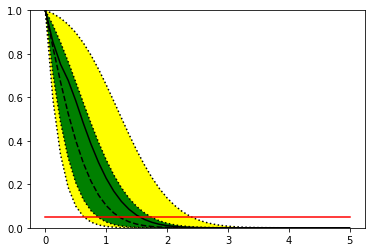

In [36]:
import matplotlib.pyplot as plt
import pyhf.contrib.viz.brazil
%matplotlib inline

f,ax = plt.subplots(1,1)
pyhf.contrib.viz.brazil.plot_results(ax,poivals,results)